In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn.cluster as kMeans
import numpy as np
import statsmodels.api as smf
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
#metricas de avaliação
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("/content/dengue_35-20 caucaia.csv", sep=",")
df

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year
0,2024-05-05,202419,146.5,8,1201,0,0.989274,39.338047,0,1,...,80.711254,80.237182,28.488889,28.555556,NaN,NaN,NaN,NaN,NaN,570
1,2024-04-28,202418,117.0,9,973,0,0.929728,31.416733,0,1,...,87.276541,86.167180,27.304545,27.454545,NaN,NaN,NaN,NaN,NaN,570
2,2024-04-21,202417,109.0,8,828,0,0.985769,29.268581,0,3,...,85.237595,84.198522,27.113636,27.181818,NaN,NaN,NaN,NaN,NaN,570
3,2024-04-14,202416,109.0,33,656,28,0.996336,29.268581,0,1,...,86.518861,84.641308,27.684211,27.894737,NaN,NaN,NaN,NaN,NaN,570
4,2024-04-07,202415,63.0,11,474,9,0.183154,16.916702,0,1,...,87.234853,85.411612,27.736842,28.000000,NaN,NaN,NaN,NaN,NaN,570
5,2024-03-31,202414,70.0,38,292,37,0.581897,18.796337,0,1,...,84.341718,83.691123,28.125000,28.200000,NaN,NaN,NaN,NaN,NaN,570
6,2024-03-24,202413,82.0,70,211,70,0.986026,22.018566,0,3,...,88.569791,86.154237,27.361111,27.611111,NaN,NaN,NaN,NaN,NaN,570
7,2024-03-17,202412,72.0,68,139,68,0.969766,19.333374,0,1,...,84.939883,83.427196,28.175000,28.250000,NaN,NaN,NaN,NaN,NaN,570
8,2024-03-10,202411,53.0,53,63,53,0.544894,14.231512,0,1,...,86.565718,84.363271,27.900000,28.000000,NaN,NaN,NaN,NaN,NaN,570
9,2024-03-03,202410,39.0,39,45,39,0.289895,10.472244,0,1,...,81.933883,81.365461,28.156863,28.176471,NaN,NaN,NaN,NaN,NaN,570


In [3]:
df["data_iniSE"] = pd.to_datetime(df["data_iniSE"])
mes = df["data_iniSE"].dt.month
dia = df["data_iniSE"].dt.day
#ano = df["data_iniSE"].dt.year
casos = df["casos"]
tempmed = df["tempmed"]
umidmed = df["umidmed"]

In [4]:
df1 = pd.DataFrame({'Dia': dia,'Mês':mes, 'Casos': casos, 'TemperaturaM':tempmed, 'UmidadeM':umidmed})

In [5]:
df1

,Dia,Mês,Casos,TemperaturaM,UmidadeM
0,5,5,0,28.488889,80.711254
1,28,4,0,27.304545,87.276541
2,21,4,0,27.113636,85.237595
3,14,4,28,27.684211,86.518861
4,7,4,9,27.736842,87.234853
5,31,3,37,28.125000,84.341718
6,24,3,70,27.361111,88.569791
7,17,3,68,28.175000,84.939883
8,10,3,53,27.900000,86.565718
9,3,3,39,28.156863,81.933883


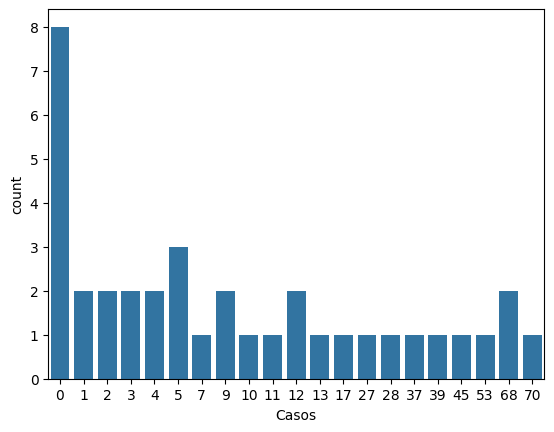

In [6]:
sns.countplot(x="Casos", data=df1);

In [7]:
columns_to_remove = ["SE","id","casos_est",
                     "casos_est_min","casos_est_max",
                     "p_rt1","p_inc100k",
                     "Localidade_id","nivel",
                     "casprov","casprov_est","casprov_est_min",
                     "casprov_est_max","casconf","tweet","Rt","pop","receptivo",
                     "transmissao","nivel_inc","notif_accum_year","versao_modelo" ]
df = df.drop(columns_to_remove, axis=1)
df.sample(4)

,data_iniSE,casos,tempmin,umidmax,umidmed,umidmin,tempmed,tempmax
35,2023-09-03,2,NaN,82.492783,NaN,NaN,NaN,NaN
17,2024-01-07,9,28.142857,78.319558,77.653739,76.987920,28.214286,28.285714
8,2024-03-10,53,27.800000,88.768165,86.565718,84.363271,27.900000,28.000000
10,2024-02-25,68,26.650000,88.472379,86.717874,84.979635,27.075000,27.500000


In [8]:
df.isnull().sum()

data_iniSE    0
casos         0
tempmin       4
umidmax       0
umidmed       4
umidmin       4
tempmed       4
tempmax       4
dtype: int64

In [9]:
df1_treino = df1.dropna(subset=["TemperaturaM","UmidadeM"])

In [10]:
X = df1_treino.drop('Casos',axis=1)
y= df1_treino['Casos']

In [11]:
X

,Dia,Mês,TemperaturaM,UmidadeM
0,5,5,28.488889,80.711254
1,28,4,27.304545,87.276541
2,21,4,27.113636,85.237595
3,14,4,27.684211,86.518861
4,7,4,27.736842,87.234853
5,31,3,28.125000,84.341718
6,24,3,27.361111,88.569791
7,17,3,28.175000,84.939883
8,10,3,27.900000,86.565718
9,3,3,28.156863,81.933883


In [12]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.3,random_state= 42)

In [13]:
sca = preprocessing.StandardScaler()

In [14]:
cols = X.columns
cols

Index(['Dia', 'Mês', 'TemperaturaM', 'UmidadeM'], dtype='object')

In [15]:
df["data_iniSE"].dtype
#float_cols = X_train

dtype('<M8[ns]')

In [16]:
float_cols = X_train

In [17]:
df.dtypes

data_iniSE    datetime64[ns]
casos                  int64
tempmin              float64
umidmax              float64
umidmed              float64
umidmin              float64
tempmed              float64
tempmax              float64
dtype: object

In [18]:
df.dtypes

data_iniSE    datetime64[ns]
casos                  int64
tempmin              float64
umidmax              float64
umidmed              float64
umidmin              float64
tempmed              float64
tempmax              float64
dtype: object

In [19]:
df.data_iniSE = df['data_iniSE']

In [20]:
df.dtypes

data_iniSE    datetime64[ns]
casos                  int64
tempmin              float64
umidmax              float64
umidmed              float64
umidmin              float64
tempmed              float64
tempmax              float64
dtype: object

In [21]:
X_train
df1.drop([12,16,23,24,35,36])

,Dia,Mês,Casos,TemperaturaM,UmidadeM
0,5,5,0,28.488889,80.711254
1,28,4,0,27.304545,87.276541
2,21,4,0,27.113636,85.237595
3,14,4,28,27.684211,86.518861
4,7,4,9,27.736842,87.234853
5,31,3,37,28.125000,84.341718
6,24,3,70,27.361111,88.569791
7,17,3,68,28.175000,84.939883
8,10,3,53,27.900000,86.565718
9,3,3,39,28.156863,81.933883


In [22]:
y_train
df1.drop([23,24,35,36])

,Dia,Mês,Casos,TemperaturaM,UmidadeM
0,5,5,0,28.488889,80.711254
1,28,4,0,27.304545,87.276541
2,21,4,0,27.113636,85.237595
3,14,4,28,27.684211,86.518861
4,7,4,9,27.736842,87.234853
5,31,3,37,28.125000,84.341718
6,24,3,70,27.361111,88.569791
7,17,3,68,28.175000,84.939883
8,10,3,53,27.900000,86.565718
9,3,3,39,28.156863,81.933883


In [23]:
df
df1.drop([12,16,23,24,35,36])

,Dia,Mês,Casos,TemperaturaM,UmidadeM
0,5,5,0,28.488889,80.711254
1,28,4,0,27.304545,87.276541
2,21,4,0,27.113636,85.237595
3,14,4,28,27.684211,86.518861
4,7,4,9,27.736842,87.234853
5,31,3,37,28.125000,84.341718
6,24,3,70,27.361111,88.569791
7,17,3,68,28.175000,84.939883
8,10,3,53,27.900000,86.565718
9,3,3,39,28.156863,81.933883


In [24]:
X_train = sca.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=cols)
X_test = sca.transform(X_test)
X_test = pd.DataFrame(X_test,columns=cols)

In [25]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [26]:
X_train

,Dia,Mês,TemperaturaM,UmidadeM
0,-1.049616,-0.613151,0.093143,1.370976
1,-0.298557,-1.355387,0.561182,-0.496159
2,1.525441,-0.860563,0.783501,0.754599
3,-1.371498,-1.107975,2.339732,-0.444360
4,0.130619,-1.107975,-0.004720,0.912995
5,-1.264204,1.118732,0.205472,-1.551665
6,1.203559,-0.613151,-0.675718,1.379858
7,0.452501,-0.613151,-1.015260,0.945464
8,-1.693380,0.871320,-0.995049,-0.958874
9,-0.298557,-0.613151,-0.000465,1.218435


In [27]:
y_pred = knn_model.predict(X_test)
y_pred

array([ 6.        , 13.66666667,  5.        , 32.33333333, 35.        ,
       29.66666667,  3.        ,  0.33333333, 27.33333333, 32.33333333])

In [28]:
y_train

4      9
16    12
5     37
13    17
11    45
26     1
1      0
2      0
31    11
3     28
29    10
25     5
32     3
22     0
18     7
27     2
6     70
20     0
34     4
7     68
10    68
14    12
30     0
Name: Casos, dtype: int64

In [29]:
#Dados nulos
df1.isnull().sum()

Dia             0
Mês             0
Casos           0
TemperaturaM    4
UmidadeM        4
dtype: int64

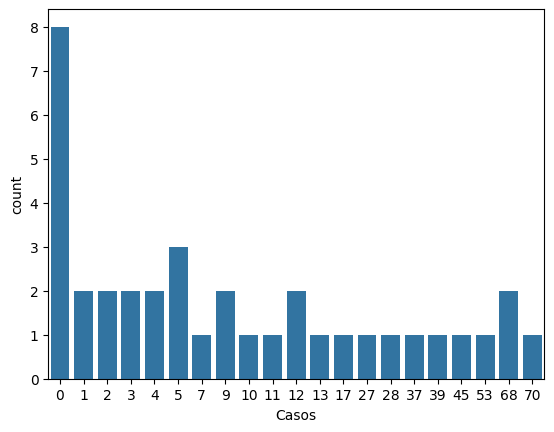

In [30]:
sns.countplot(x="Casos", data=df1);

In [31]:
fig = px.scatter(df1, x="Casos",
                 y="Mês",
                 title= "Numeros de Casos")
fig.show()

In [32]:
fig = px.scatter(x=y_test, y=y_pred, title="Casos por Mês", trendline="ols", labels= {"X":"Casos","y":"Mês"})
fig.show()

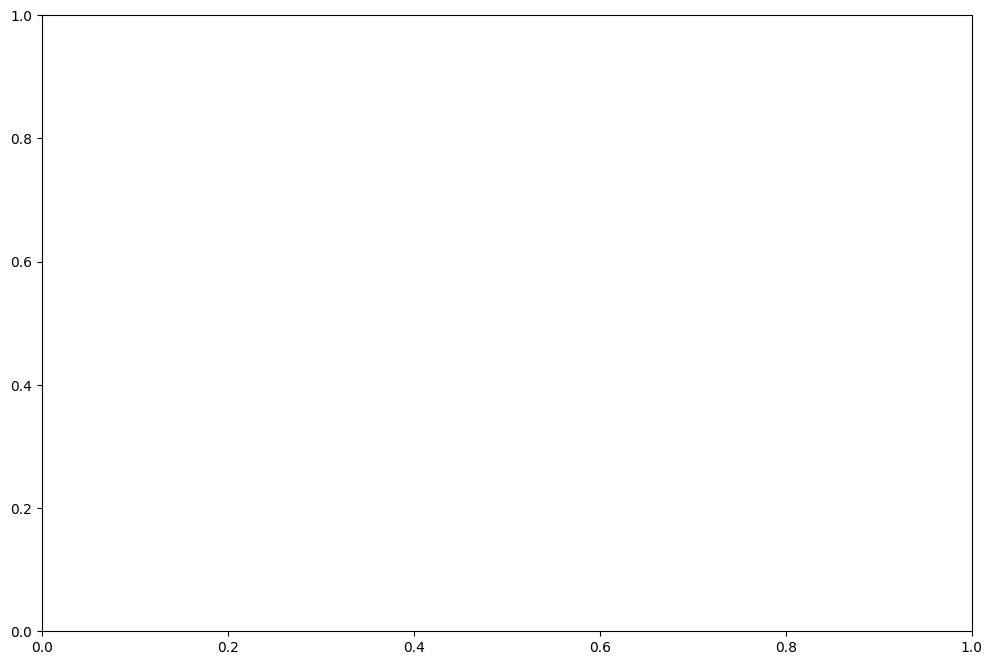

In [33]:
barWidth = 0.15
fig = plt.subplots(figsize =(12,8))

Text(0.5, 1.0, 'Nível de casos')

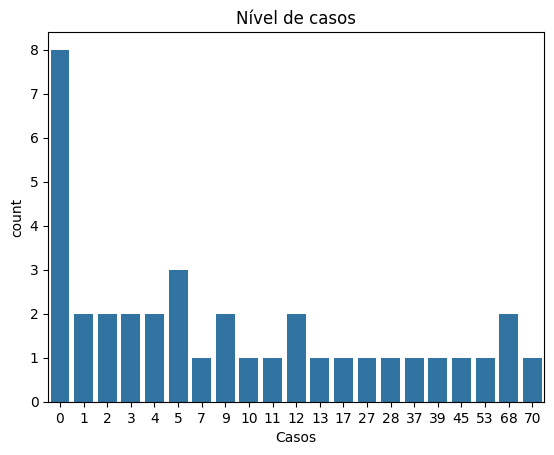

In [34]:
sns.countplot(x="Casos", data=df1)
plt.title("Nível de casos")

In [35]:
decision_tree = DecisionTreeClassifier()

In [36]:
df1

,Dia,Mês,Casos,TemperaturaM,UmidadeM
0,5,5,0,28.488889,80.711254
1,28,4,0,27.304545,87.276541
2,21,4,0,27.113636,85.237595
3,14,4,28,27.684211,86.518861
4,7,4,9,27.736842,87.234853
5,31,3,37,28.125000,84.341718
6,24,3,70,27.361111,88.569791
7,17,3,68,28.175000,84.939883
8,10,3,53,27.900000,86.565718
9,3,3,39,28.156863,81.933883


In [37]:
X_test

,Dia,Mês,TemperaturaM,UmidadeM
0,0.023325,0.623908,-0.964733,-0.383059
1,0.452501,-1.355387,1.831575,-0.720469
2,0.559795,0.871320,-1.189137,-0.612434
3,-1.049616,-1.355387,0.942300,-0.670262
4,-0.727734,-0.860563,0.383327,1.228418
5,-1.478792,-0.860563,0.840170,0.241615
6,0.774383,1.366144,0.741615,-0.184280
7,-0.727734,1.366144,0.417750,-1.014413
8,-0.620439,-1.107975,0.278873,0.832466
9,-1.264204,-0.365739,1.430696,-0.018864


In [38]:
def evaluate_regression_model(model,X_test,y_test):
    pred = model.predict(X_test)
    print("R Square Error : ",r2_score(y_test,pred))
    print("Mean Absolute Error (MAE) : ",mean_absolute_error(y_test,pred))
    print("Root Mean Squared Error (RMSE) : ",np.sqrt(mean_absolute_error(y_test,pred)))

In [39]:
evaluate_regression_model(knn_model, X_test, y_test)

R Square Error :  0.34199020636586197
Mean Absolute Error (MAE) :  8.733333333333334
Root Mean Squared Error (RMSE) :  2.955221367906867
